# We04b-keras
# Rodgers Okeyo Ochieng
Description: Find a unique dataset (use the one from last week) and develop a predictive model using Keras. Start with the Keras-hyperparameter-tuning notebook. Update the build_model function to include 5 to 10 layers, with each layer consisting of any multiple of 10 from 100 to 1000 units (note: the step parameter will help you). Add a summary section to discuss your results.

# Import packages
Description: I import some of the packages I will need for this project. 

In [79]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # (levels are 0 to 2 - default is 0; warnings are 1 and errors are 2)
import tensorflow as tf

In [80]:
from __future__ import print_function
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from sklearn import datasets

np.random.seed(8085)

In [81]:
import keras_tuner # you will most likely need to install this using ```conda install -c conda-forge keras-tuner``` or ```pip install keras-tuner```
from tensorflow import keras
from tensorflow.keras import layers

# Introduction. 

I am developing this classification model for electric vehicles to support the governments infrastructure planning. By accurately predicting the type of electric vehicles in our region, we can strategically plan the placement, capacity, and specifications of charging infrastructure. This data-driven approach enables us to optimize charging station placement, estimate charging requirements, and customize infrastructure development, ultimately promoting EV adoption and sustainable transportation.

# Read data into a dataframe

Description: Using the pandas library, we load the data into a dataframe and name it df

In [82]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Check the data
* Description: First I noticed that there were objects and floating point numbers. I  knew that I would need to do some encoding at some stage.  I changed the column names into lower case  and then separated them with an _. 

In [83]:
print(df.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [84]:
# Create a mapping dictionary to convert column names to lowercase and separate with underscores
new_columns = {col: col.lower().replace(' ', '_') for col in df.columns}

# Use the rename() function to update the column names
df.rename(columns=new_columns, inplace=True)

# Print the updated column names
print(df.columns)

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')


After looking at the data, I was interested in understanding this electric vehicle type. I wanted to know how many types of electric vehicles exists. Because of this, I would like to learn and understand the number of unique featutes that exists in this electric vehicle type. 

In [85]:
unique_count = df['electric_vehicle_type'].nunique()

print(unique_count)

2


I wanted to know their names and even understand these two types of electric vehicle. . 

In [86]:
unique_count = df['electric_vehicle_type'].value_counts()

# Print the unique instances and their counts
for instance, count in unique_count.items():
    print(instance, count)

Battery Electric Vehicle (BEV) 96266
Plug-in Hybrid Electric Vehicle (PHEV) 28450


I plotted electric_vehicle_type against electric range to understand which among the two had a higher range. My aim was  to test if there was any significant differences in the distribution of the two types vehicles. 

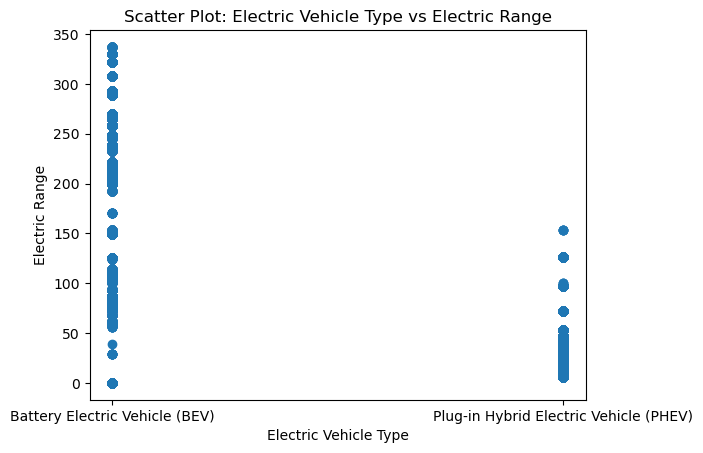

In [87]:
import matplotlib.pyplot as plt

# Scatter plot of electric_vehicle_type vs electric_range
plt.scatter(df['electric_vehicle_type'], df['electric_range'])

# Set labels for x-axis and y-axis
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')

# Set title for the plot
plt.title('Scatter Plot: Electric Vehicle Type vs Electric Range')

# Display the plot
plt.show()

I then took a look at the histogram to understand the distribution of the two types. 

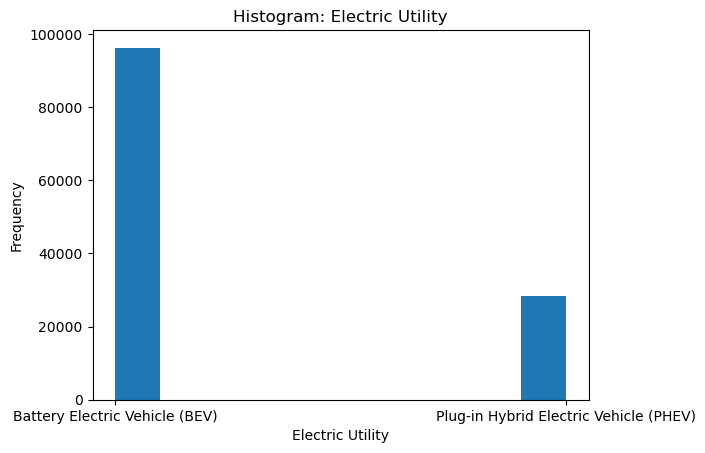

In [88]:
# Plot histogram of electric_utility
plt.hist(df['electric_vehicle_type'])

# Set labels for x-axis and y-axis
plt.xlabel('Electric Utility')
plt.ylabel('Frequency')

# Set title for the plot
plt.title('Histogram: Electric Utility')

# Display the plot
plt.show()

The histogram shows that there are more BEV than PHEV. 

Let me try to see if the variable electric utility has some interesting data. THe distribution seems 

In [89]:
unique_count = df['electric_utility'].nunique()

print(unique_count)

73


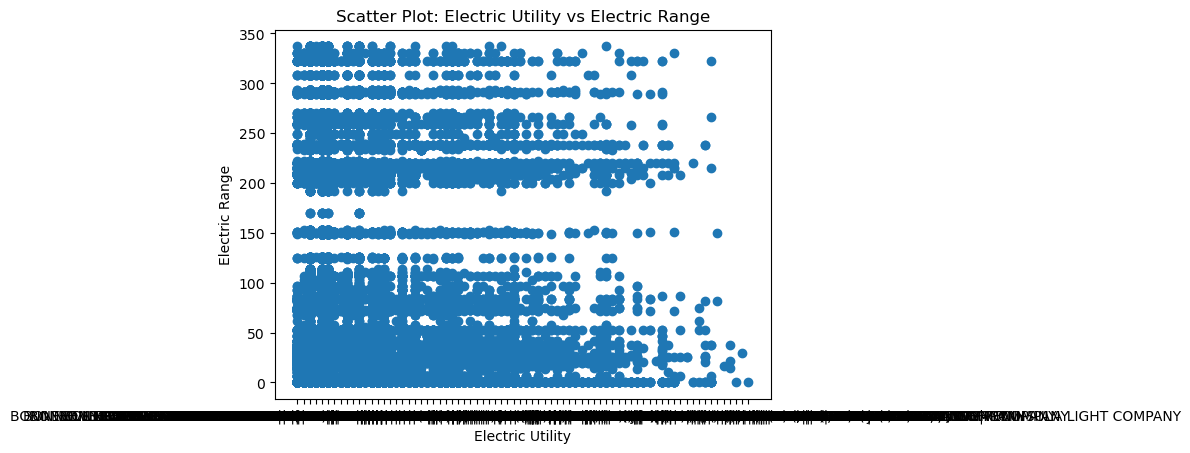

In [90]:
# Convert 'electric_utility' column to string type
df['electric_utility'] = df['electric_utility'].astype(str)

# Scatter plot of electric_utility vs electric_range
plt.scatter(df['electric_utility'], df['electric_range'])

# Set labels for x-axis and y-axis
plt.xlabel('Electric Utility')
plt.ylabel('Electric Range')

# Set title for the plot
plt.title('Scatter Plot: Electric Utility vs Electric Range')

# Display the plot
plt.show()

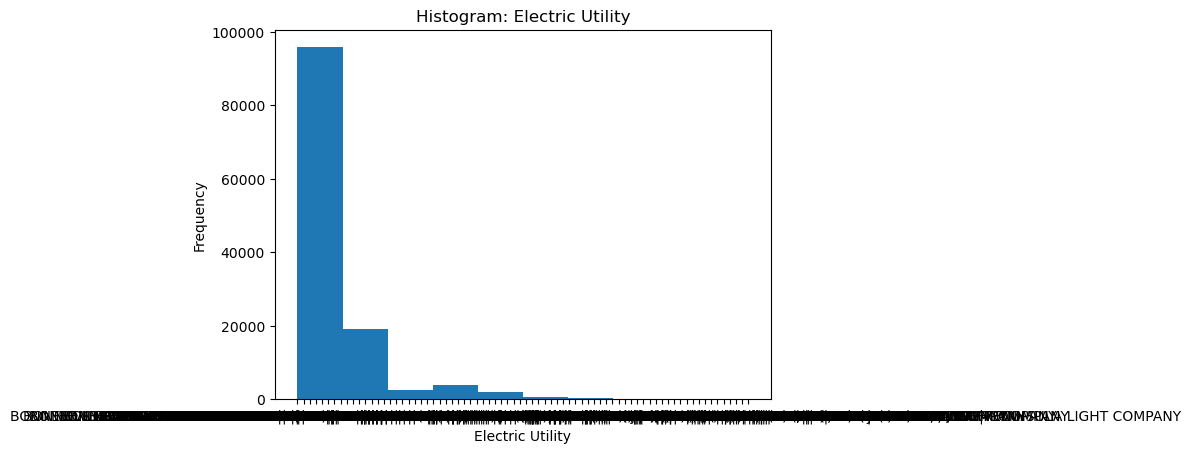

In [91]:
# Plot histogram of electric_utility
plt.hist(df['electric_utility'])

# Set labels for x-axis and y-axis
plt.xlabel('Electric Utility')
plt.ylabel('Frequency')

# Set title for the plot
plt.title('Histogram: Electric Utility')

# Display the plot
plt.show()

In [92]:
unique_count = df['clean_alternative_fuel_vehicle_(cafv)_eligibility'].value_counts()

# Print the unique instances and their counts
for instance, count in unique_count.items():
    print(instance, count)

Clean Alternative Fuel Vehicle Eligible 59334
Eligibility unknown as battery range has not been researched 49685
Not eligible due to low battery range 15697


3


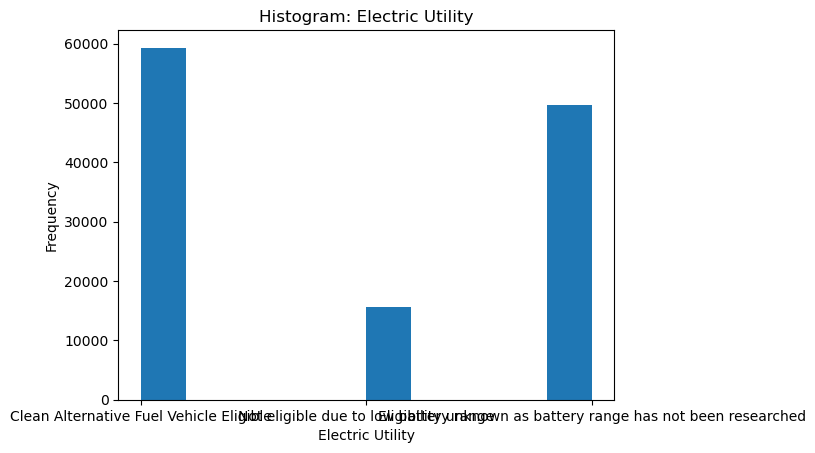

In [93]:

unique_count = df['clean_alternative_fuel_vehicle_(cafv)_eligibility'].nunique()

print(unique_count)

# Plot histogram of electric_utility
plt.hist(df['clean_alternative_fuel_vehicle_(cafv)_eligibility'])

# Set labels for x-axis and y-axis
plt.xlabel('Electric Utility')
plt.ylabel('Frequency')

# Set title for the plot
plt.title('Histogram: Electric Utility')

# Display the plot
plt.show()


From this graph we can tell that BEV have a wider range than PHEV. 

# Removing some variables 
In order to simplify the model and focus on the key variables for predicting electric vehicle types, I willremove the following variables from the analysis. Firstly, the 'vin_(1-10)' variable, representing the vehicle identification number, is typically a unique identifier and is unlikely to provide any meaningful insights for classifying electric vehicle types. Additionally, variables such as 'county', 'city', 'state', and 'postal_code', which denote geographical information, might not directly influence the electric vehicle type and can be omitted. Similarly, 'model_year', 'make', and 'model' variables, which capture details about the vehicle's year, make, and model, may have limited impact on electric vehicle classification. Lastly, variables like 'dol_vehicle_id', 'vehicle_location', and '2020_census_tract' appear to be administrative or location-specific identifiers and are not expected to significantly contribute to the prediction of electric vehicle types. By removing these variables, we can streamline the model and focus on the most relevant features for infrastructure planning and decision-making.

In [94]:
columns_to_drop = ['vin_(1-10)','postal_code','dol_vehicle_id','legislative_district','2020_census_tract','county','city','state','model_year','make','model','model','dol_vehicle_id','vehicle_location']
df = df.drop(columns_to_drop, axis=1)

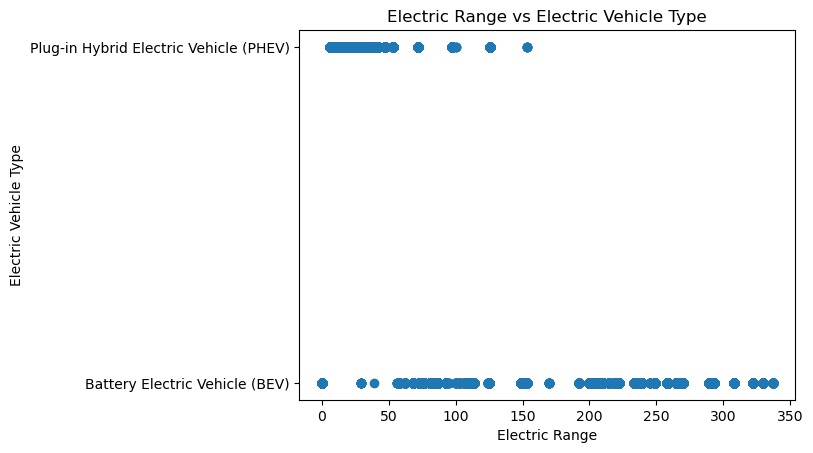

In [95]:
# Create the scatter plot
plt.scatter(df['electric_range'], df['electric_vehicle_type'])

# Set labels and title
plt.xlabel('Electric Range')
plt.ylabel('Electric Vehicle Type')
plt.title('Electric Range vs Electric Vehicle Type')

# Display the plot
plt.show()

In [96]:
print(df.describe())

       electric_range      base_msrp
count   124716.000000  124716.000000
mean        79.471936    1556.068909
std        100.331969   10053.289929
min          0.000000       0.000000
25%          0.000000       0.000000
50%         25.000000       0.000000
75%        200.000000       0.000000
max        337.000000  845000.000000


In [97]:
print(df.columns)

Index(['electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'electric_utility'],
      dtype='object')


In [98]:
missing_values = df.isnull().sum()
print(missing_values)


electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
electric_utility                                     0
dtype: int64


Great news! The dataset does not contain any missing values. We can now proceed to the next step, which is checking if there are any string variables in the dataset. This will help us determine if any categorical variables need to be encoded for further analysis or modeling. Let's continue exploring the data to identify any string data types.

In [99]:
print(df.dtypes)

electric_vehicle_type                                object
clean_alternative_fuel_vehicle_(cafv)_eligibility    object
electric_range                                        int64
base_msrp                                             int64
electric_utility                                     object
dtype: object


I selected one-hot encoding and label encoding for encoding the categorical variables. One-hot encoding was chosen for and 'clean_alternative_fuel_vehicle_(cafv)_eligibility' due to its distinct classes without any order. Label encoding was applied to 'electric_utility' to capture any ordinal relationship between categories and simplify the representation of multiple unique values. These encoding methods enable the use of categorical variables in machine learning models and ensure valuable information is utilized for accurate predictions. Because electric_vehicle_type is the target variable, I used label encoding eventhough it does not have any order. I did this to ensure that the target variable was only one column unlike the one hot encoder that would have to create two different columns. 

In [100]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode 'electric_utility' using label encoding
df['electric_utility'] = label_encoder.fit_transform(df['electric_utility'])
df['electric_vehicle_type'] = label_encoder.fit_transform(df['electric_vehicle_type'])

In [101]:
df.columns

Index(['electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'electric_utility'],
      dtype='object')

In [102]:
# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding for 'clean_alternative_fuel_vehicle_(cafv)_eligibility'
encoded_features = onehot_encoder.fit_transform(df[['clean_alternative_fuel_vehicle_(cafv)_eligibility','electric_utility']])

# Create column names for the encoded features
feature_names = ['clean_alternative_fuel_vehicle_(cafv)_eligibility_' + str(i) for i in range(encoded_features.shape[1])]

# Truncate the feature names based on the actual number of columns in encoded_features
feature_names = feature_names[:encoded_features.shape[1]]

# Create a dataframe from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original dataframe with the encoded dataframe
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original columns that have been encoded
columns_to_drop = ['clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_utility']
df_encoded = df_encoded.drop(columns_to_drop, axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [103]:
print(df_encoded.describe())

       electric_vehicle_type  electric_range      base_msrp  \
count          124716.000000   124716.000000  124716.000000   
mean                0.228118       79.471936    1556.068909   
std                 0.419621      100.331969   10053.289929   
min                 0.000000        0.000000       0.000000   
25%                 0.000000        0.000000       0.000000   
50%                 0.000000       25.000000       0.000000   
75%                 0.000000      200.000000       0.000000   
max                 1.000000      337.000000  845000.000000   

       clean_alternative_fuel_vehicle_(cafv)_eligibility_0  \
count                                      124716.000000     
mean                                            0.475753     
std                                             0.499414     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.000000    

## Cross validation
To perform cross-validation and split the data into training and test sets, I utilized scikit-learn's train_test_split function. With the aim of allocating 20% of the data for the test set, I partitioned the data accordingly. Following this split, I examined the dimensions of both the training and test dataframes to ascertain the number of rows and columns in each. This provided insights into the size and structure of the datasets, aiding in further analysis and model development.

In [104]:
# Extract the target and feature columns from train_df and test_df
X = df_encoded.drop('electric_vehicle_type', axis=1)
y = df_encoded['electric_vehicle_type']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (99772, 79)
Shape of y_train: (99772,)
Shape of X_test: (24944, 79)
Shape of y_test: (24944,)


In [106]:
# Save X_train
# X_train.to_csv('X_train.csv', index=False)

# Save X_test
# X_test.to_csv('X_test.csv', index=False)

# Save y_train
# y_train.to_csv('y_train.csv', index=False)

# Save y_test
# y_test.to_csv('y_test.csv', index=False)


We set the input_shape which will be the number of inputs for our keras model. 

In [107]:
num_columns_X_train = X_test.shape[1]
print("Number of columns in X_train:", num_columns_X_train)
input_shape = num_columns_X_train

Number of columns in X_train: 79


# Standardization
Since neural networks are sensitive to differences in scaling, we need to standardize the feature variables in both the training and testing datasets. 

In [108]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model
Description: The code in the cells below defines, compiles, and trains a deep neural network model using Keras for binary classification. The model consists of ten dense layers with varying numbers of units from 100 to 1000 with an increase of 100, using the ReLU activation function for the hidden layers and the sigmoid activation function for the output layer which has 1 output. The input layer has an input shape similar to the number of columns in X_train and X_test It is compiled with the Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric. The model is then trained for 10 epochs using the specified batch size, while monitoring its performance on the validation data. The code outputs the loss and accuracy values for the test dataset after training.

In [109]:
%%time
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(700, activation='relu'),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dense(900, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=300, validation_data=(X_test, y_test))

Epoch 1/10
333/333 [==============================] - 29s 80ms/step - loss: 0.1052 - accuracy: 0.9567 - val_loss: 0.0574 - val_accuracy: 0.9806
Epoch 2/10
333/333 [==============================] - 26s 79ms/step - loss: 0.0600 - accuracy: 0.9802 - val_loss: 0.0525 - val_accuracy: 0.9839
Epoch 3/10
333/333 [==============================] - 26s 79ms/step - loss: 0.0550 - accuracy: 0.9820 - val_loss: 0.0525 - val_accuracy: 0.9819
Epoch 4/10
333/333 [==============================] - 26s 79ms/step - loss: 0.0488 - accuracy: 0.9839 - val_loss: 0.0464 - val_accuracy: 0.9839
Epoch 5/10
333/333 [==============================] - 26s 78ms/step - loss: 0.0465 - accuracy: 0.9838 - val_loss: 0.0464 - val_accuracy: 0.9843
Epoch 6/10
333/333 [==============================] - 26s 79ms/step - loss: 0.0428 - accuracy: 0.9844 - val_loss: 0.0378 - val_accuracy: 0.9848
Epoch 7/10
333/333 [==============================] - 26s 79ms/step - loss: 0.0383 - accuracy: 0.9850 - val_loss: 0.0337 - val_accuracy:

I noticed that as I reduce the batch size, the training time increases. BEcause of this I tried to set a batch size that could help speed up the process. a batch size of 300 was  fast.

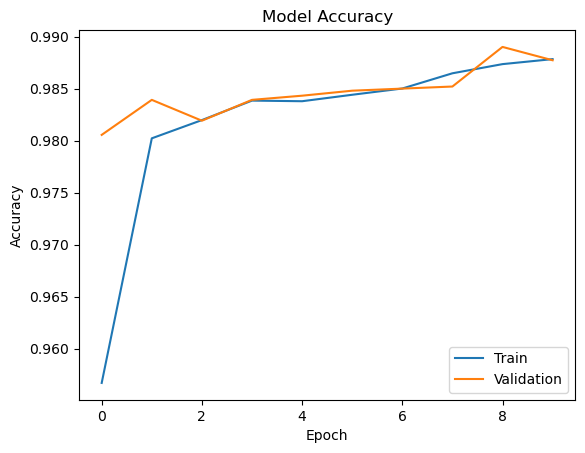

In [110]:
# Plot the model accuracy
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The plot shows that the training data started with a lower accuracy of close to 0.98. As the training continued and the number of epochs increased, the accuracy improved. Most of the improvement of the training accuracy improved after doing the first epoch. As the number of epochs increased the accuracy also improved. 

In [111]:
from sklearn.metrics import confusion_matrix

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

780/780 [==============================] - 6s 7ms/step
[[19235    52]
 [  254  5403]]


In [112]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


780/780 [==============================] - 6s 8ms/step - loss: 0.0335 - accuracy: 0.9877
Test Loss: 0.03349596634507179
Test Accuracy: 0.9877325296401978


In [113]:
from sklearn.metrics import confusion_matrix

# Assuming you have a confusion matrix stored in the variable 'cm'
TN, FP, FN, TP = cm.ravel()

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9904674610449129
Recall: 0.9550998762595015


## Conclusion and discussion

When creating the neural network, I started with an epoch of 32 as I had got from ChatGPT. However, I noticed that my dataset contained over 28,000 rows and 81 columns after the encoding. This means that it would take a very long time to process the model. It now gets to me why it is important to understand the parameters that go into each model . 

THe objective of this project was to easily classify an ev as either BEV or PHEV. With BEV cars having a higher range, we can identfy PHEV vehicles and place a higher tax on them. It would be very bad clasify a PHEV as BEV and let it ejoy the benfits it does not deserve compared to classifying BEV as PHEV. Because of this we should focus on metriics such as precision and recall (sensitivity) for the BEV class. Precision measures the proportion of instances classified as BEVs that are actually BEVs, while recall measures the proportion of actual BEVs that are correctly classified.

I was therefore aiming for a high precision to minimize misclassifying PHEVs as BEVs. A higher precision would mean that the model is correctly identifying BEVs, reducing the risk of applying benefits or incentives intended specifically for BEVs to PHEVs.

To achieve this, I could set a threshold for the predicted probabilities or scores from the model. By adjusting the threshold, I can prioritize precision over recall. A higher threshold would likely result in fewer instances classified as BEVs, but those instances would have a higher probability of truly being BEVs.

Additionally, I can also look at the specific cell in the confusion matrix representing misclassified instances where PHEVs are predicted as BEVs. Analyzing the false positive (FP) cases can provide insights into the nature and characteristics of these misclassifications. It can help identify patterns or features that are causing the confusion and potentially guide adjustments to the model or feature selection.

By leveraging the precision and analyzing the false positive cases, you can work towards reducing misclassifications of PHEVs as BEVs, ensuring that BEVs receive the appropriate benefits while correctly identifying and potentially taxing PHEVs. Remember that this approach requires a trade-off between precision and recall, as a higher precision may result in a lower recall for the BEV class.